In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("loan.csv")

In [3]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Rdhak\AppData\Local\Temp\ipykernel_14056\168014015.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dataset["ApplicantIncome"])


<Axes: ylabel='Density'>

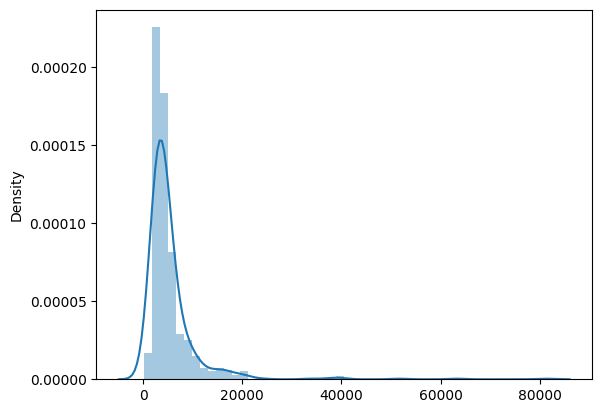

In [5]:
sns.distplot(x=dataset["ApplicantIncome"])

In [7]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss=StandardScaler()
ss.fit(dataset[["ApplicantIncome"]])
scaled_dataset=ss.transform(dataset[["ApplicantIncome"]])
scaled_dataset

In [13]:
dataset["scaled_applicantIncome"]=pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]),columns=["x"])

In [14]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,scaled_applicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


C:\Users\Rdhak\AppData\Local\Temp\ipykernel_14056\938448428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["scaled_applicantIncome"])


<Axes: xlabel='scaled_applicantIncome', ylabel='Density'>

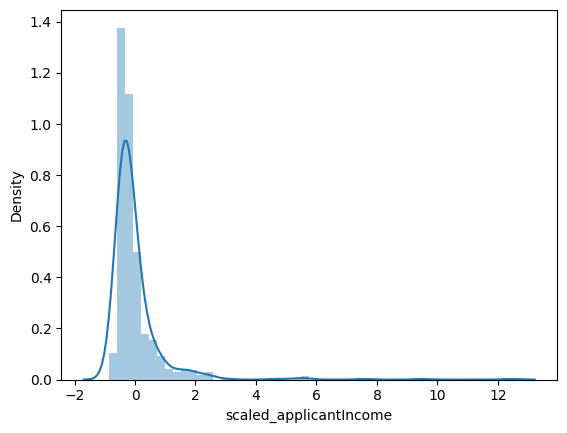

In [16]:
sns.distplot(dataset["scaled_applicantIncome"])

C:\Users\Rdhak\AppData\Local\Temp\ipykernel_14056\1581942636.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])
C:\Users\Rdhak\AppData\Local\Temp\ipykernel_14056\1581942636.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["scaled_applicantIncome"])


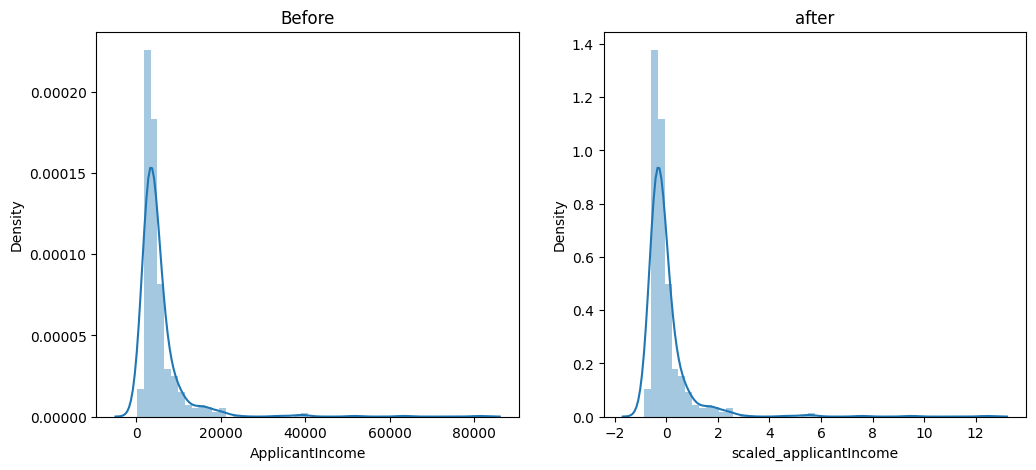

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["ApplicantIncome"])


plt.subplot(1,2,2)
plt.title("after")
sns.distplot(dataset["scaled_applicantIncome"])
plt.show()

standard scalar will change the magnitude of the data but not remove the outliers 
data are in same pattern after using standard scaler but in reduced number form 

In [21]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,scaled_applicantIncome
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


 # Min_Max Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
ms=MinMaxScaler()
dataset["scaled_coapp"]=ms.fit_transform(dataset[["CoapplicantIncome"]])
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,scaled_applicantIncome,scaled_coapp
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000


C:\Users\Rdhak\AppData\Local\Temp\ipykernel_14056\1275995485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\Rdhak\AppData\Local\Temp\ipykernel_14056\1275995485.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["scaled_coapp"])


<Axes: title={'center': 'after'}, xlabel='scaled_coapp', ylabel='Density'>

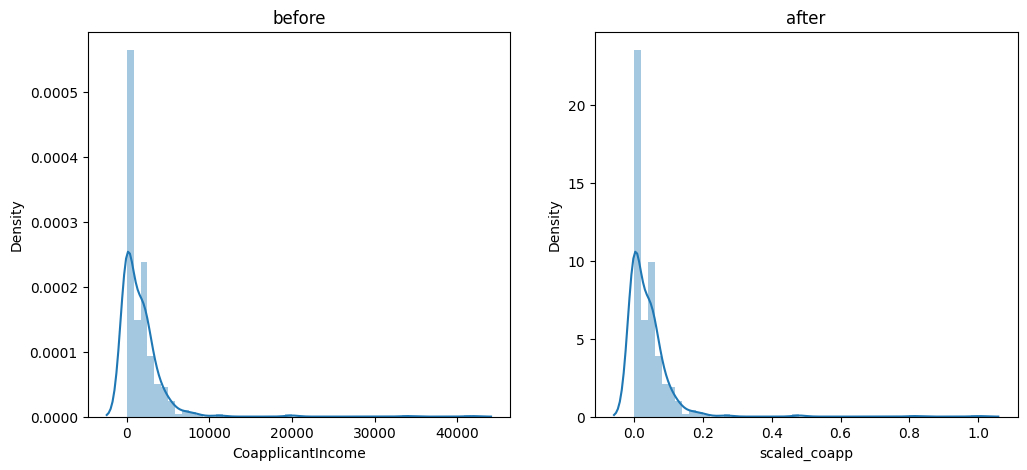

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(dataset["CoapplicantIncome"])
plt.subplot(1,2,2)
plt.title("after")
sns.distplot(dataset["scaled_coapp"])